## Jorge P. Rodríguez, 2023

In [15]:
import pandas as pd
import geopandas as gp
import pylab as plt
import numpy as np
plt.style.use('classic')
import matplotlib.colors as colors
import matplotlib.colorbar as chi
import math
from shapely import wkt
from shapely.geometry import LineString as line
from shapely.geometry import Polygon

In [2]:
df = pd.read_csv('./data/all_morethan664N_01deg.csv',float_precision='round_trip')

df = df.round(decimals=4)
df.head()

,lat,lon,hours_total,geometry,hours_cargo,hours_fishing,hours_tanker,hours_passenger,cell
0,66.4,-170.5,9.0,"POLYGON ((-170.5 66.4, -170.4 66.4, -170.4 66....",3.0,0.0,0.0,0.0,5630495
1,66.4,-170.4,11.0,"POLYGON ((-170.4 66.4, -170.3 66.4, -170.3 66....",4.0,0.0,0.0,1.0,5630496
2,66.4,-170.3,22.0,"POLYGON ((-170.3 66.4, -170.20000000000002 66....",8.0,1.0,2.0,0.0,5630497
3,66.4,-170.2,29.0,"POLYGON ((-170.2 66.4, -170.1 66.4, -170.1 66....",11.0,0.0,3.0,0.0,5630498
4,66.4,-170.1,17.0,"POLYGON ((-170.1 66.4, -170 66.4, -170 66.5, -...",7.0,0.0,4.0,0.0,5630499


In [3]:
ulons = list(df.lon.unique())
ulons.sort()
print(len(ulons))

3570


In [4]:
#now we should normalize by cell area
R = 6371.
areas = []
pi = np.pi
for lat in df.lat.values:
    areas.append(R*R*abs(math.sin(pi*(lat+0.1)/180.)-math.sin(pi*(lat)/180.))*(pi/180.))
df['area']=areas
df['rho_total']=df['hours_total']/df['area']
df['rho_cargo']=df['hours_cargo']/df['area']
df['rho_passenger']=df['hours_passenger']/df['area']
df['rho_fishing']=df['hours_fishing']/df['area']

df['rho_tanker']=df['hours_tanker']/df['area']


In [5]:
df.head()

,lat,lon,hours_total,geometry,hours_cargo,hours_fishing,hours_tanker,hours_passenger,cell,area,rho_total,rho_cargo,rho_passenger,rho_fishing,rho_tanker
0,66.4,-170.5,9.0,"POLYGON ((-170.5 66.4, -170.4 66.4, -170.4 66....",3.0,0.0,0.0,0.0,5630495,494.015026,0.018218,0.006073,0.000000,0.000000,0.000000
1,66.4,-170.4,11.0,"POLYGON ((-170.4 66.4, -170.3 66.4, -170.3 66....",4.0,0.0,0.0,1.0,5630496,494.015026,0.022267,0.008097,0.002024,0.000000,0.000000
2,66.4,-170.3,22.0,"POLYGON ((-170.3 66.4, -170.20000000000002 66....",8.0,1.0,2.0,0.0,5630497,494.015026,0.044533,0.016194,0.000000,0.002024,0.004048
3,66.4,-170.2,29.0,"POLYGON ((-170.2 66.4, -170.1 66.4, -170.1 66....",11.0,0.0,3.0,0.0,5630498,494.015026,0.058703,0.022267,0.000000,0.000000,0.006073
4,66.4,-170.1,17.0,"POLYGON ((-170.1 66.4, -170 66.4, -170 66.5, -...",7.0,0.0,4.0,0.0,5630499,494.015026,0.034412,0.014170,0.000000,0.000000,0.008097


In [6]:
cats = ['total','cargo','fishing','passenger','tanker']
avrho = [[] for i in range(len(cats))]
for elem in ulons:
    samp = df[df['lon'] == elem]
    for ix,c in enumerate(cats):
        samp1 = samp[samp[f'hours_{c}']>0.0]
        avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: Runtim

<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())
<ipython-input-6-2bcebffc16d7>:7: RuntimeWarning: invalid value encountered in double_scalars
  avrho[ix].append(samp1[f'hours_{c}'].sum()/samp1['area'].sum())


Text(0.5, 0, 'Longitude')

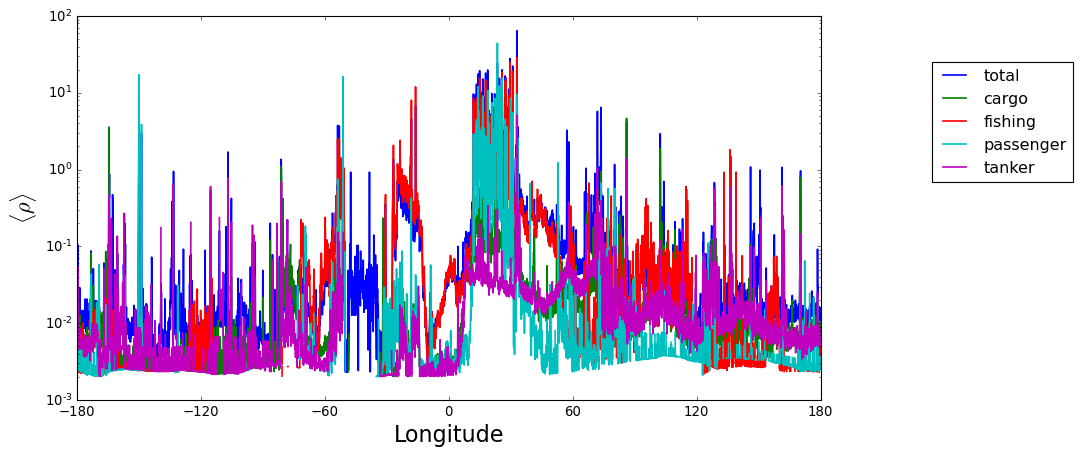

In [7]:
fig = plt.figure(figsize=(12,6))
fig.set_facecolor('w')
for i in range(len(cats)):
    plt.plot(ulons,avrho[i],label=cats[i],lw=1.5)
plt.legend(bbox_to_anchor=(1.35,0.9))
plt.yscale('log')
plt.xlim(-180,180)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.ylabel(r'$\langle \rho \rangle$',size=20)
plt.xlabel(r'Longitude',size=20);

In [8]:
relrho = [[] for i in range(len(cats))]
for index, row in df.iterrows():
    pt = ulons.index(row['lon'])
    for ix,c in enumerate(cats):
        relrho[ix].append(row[f'rho_{c}']/avrho[ix][pt])
for ix,c in enumerate(cats):
    df[f'relrho_{c}']=relrho[ix]
        

In [9]:
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gp.GeoDataFrame(df, crs='epsg:4326')

In [10]:
gdf2 = gdf.to_crs('esri:102017')

In [11]:
cnorm = colors.Normalize(vmin=0,vmax=2)

In [12]:
world = gp.read_file('../../Fishing/continent/continent.shp')
world = world.dissolve(aggfunc='sum')

In [13]:
world2 = world.to_crs('esri:102017')
world2 = world2.dissolve(aggfunc='sum')

In [16]:
xmin = -2.7e6
xmax = 2.7e6
ymin = -2.7e6
ymax = 2.7e6
mask = Polygon([(xmin,ymin),(xmax,ymin),(xmax,ymax),(xmin,ymax),(xmin,ymin)])
world3 = gp.clip(world2,mask)

In [18]:
#References line in the map
gaux = gp.GeoDataFrame(geometry=[line([(i,80) for i in range(-180,181)]),
                                 line([(i,70) for i in range(-180,181)]),
                                 line([(i,60) for i in range(-180,181)]),
                                line([(0,i) for i in range(80,60,-1)]),
                                line([(90,i) for i in range(80,60,-1)]),
                                     line([(-90,i) for i in range(80,60,-1)]),
                                 line([(180,i) for i in range(80,60,-1)])],
                       crs = 'epsg:4326')

In [19]:
gaux2 = gaux.to_crs('esri:102017')

In [21]:
gdf2['relrho_total'].max()

237.19860399272136

In [23]:
#Arctic circle
pcaux = gp.GeoDataFrame(geometry=[line([(i,66.6) for i in range(-180,181)])],
                       crs = 'epsg:4326')

In [24]:
pcaux2 = pcaux.to_crs('esri:102017')

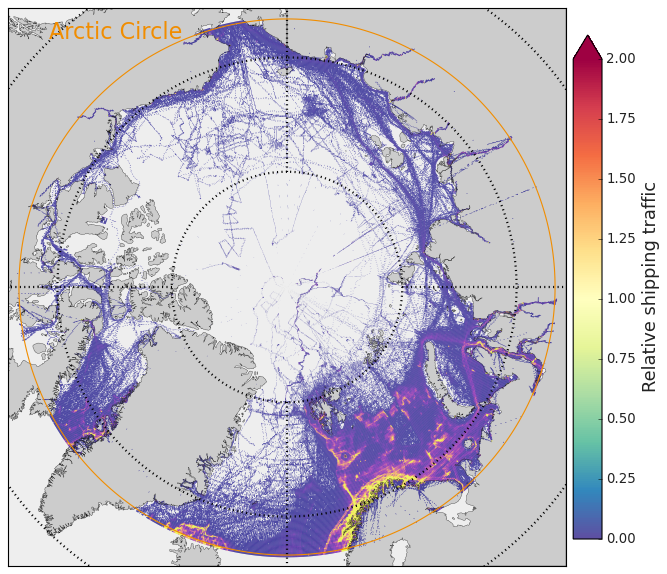

In [26]:
fig = plt.figure(figsize=(9,9))
fig.set_facecolor('w')
ax = plt.gca()
ax.set_facecolor('#eeeeee')
world3.plot(ax=ax,color='none',ec='#222222',zorder=2.1,lw=0.3)
world3.plot(ax=ax,color='#cccccc',ec='none',zorder=2.0)
gdf2.plot(column='rho_total',ax=ax,norm=cnorm,cmap='plasma',zorder=2.05,lw=1e-6,ec='None',alpha=1)
gaux2.plot(ax=ax,color='k',ls='dotted',zorder=2.2,lw=2)
pcaux2.plot(ax=ax,color='#f18d00',ls='-',zorder=2.2)
plt.text(-2.3e6,2.4e6,'Arctic Circle',color='#f18d00',size=20)
plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])

axc = fig.add_axes([0.91,0.15,0.04,0.7])
clb=chi.ColorbarBase(axc,cmap=plt.get_cmap('Spectral_r'),norm=cnorm,orientation='vertical',extend='max')


clb.set_label(r'Relative shipping traffic', fontsize=16,color='#222222')
plt.yticks(color='#222222')
clb.ax.tick_params(labelsize=12);

Text(0.5, 1.0, 'Tanker')

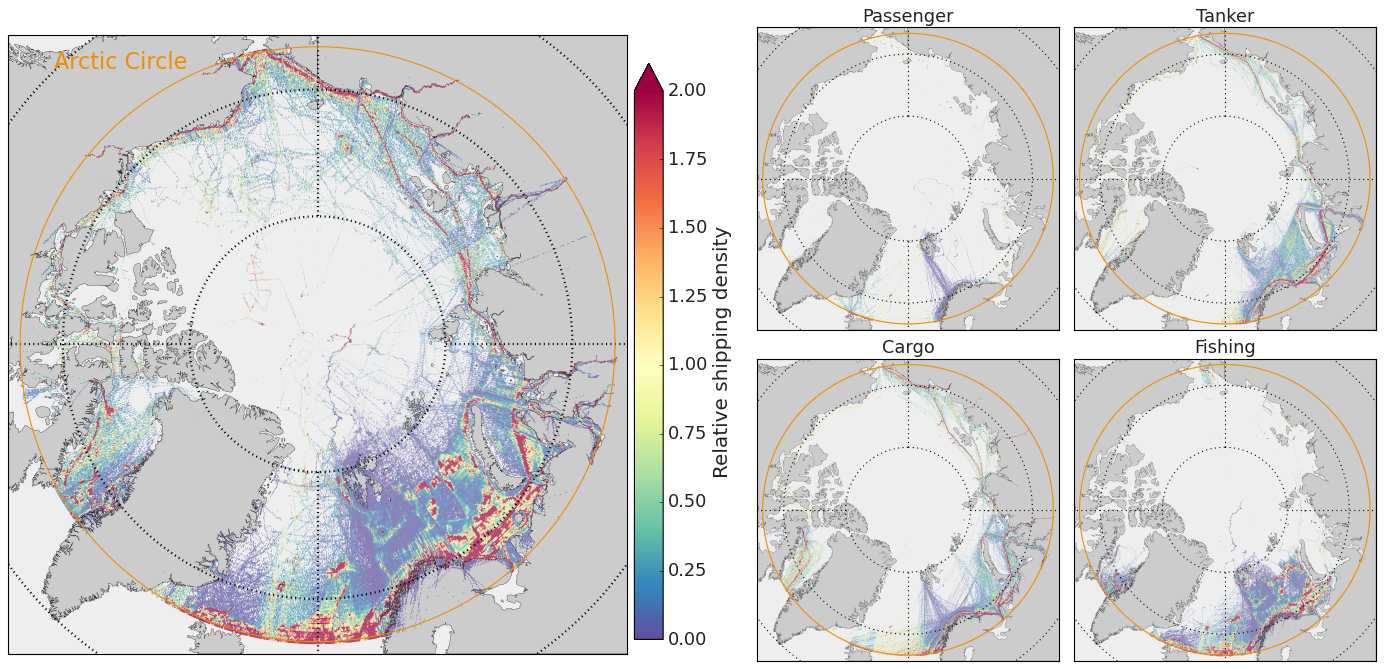

In [34]:
fig = plt.figure(figsize=(9,9))
fig.set_facecolor('w')
ax = plt.gca()
ax.set_position([0.06,0.08,0.86,0.86])
ax.set_facecolor('#eeeeee')
world3.plot(ax=ax,color='none',ec='#222222',zorder=2.1,lw=0.3)
world3.plot(ax=ax,color='#cccccc',ec='none',zorder=2.0)
gaux2.plot(ax=ax,color='k',ls='dotted',zorder=2.2,lw=2)
pcaux2.plot(ax=ax,color='#f18d00',ls='-',zorder=2.2)
gdf2.plot(column='relrho_total',ax=ax,norm=cnorm,cmap='Spectral_r',zorder=2,lw=1e-6,ec='None',alpha=1.0)

plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])
plt.text(-2.3e6,2.4e6,'Arctic Circle',color='#f18d00',size=20)

axc = fig.add_axes([0.93,0.1,0.04,0.8])
clb=chi.ColorbarBase(axc,cmap=plt.get_cmap('Spectral_r'),norm=cnorm,orientation='vertical',extend='max')

clb.set_label(r'Relative shipping density', fontsize=18,color='#222222')
plt.yticks(color='#222222')
clb.ax.tick_params(labelsize=16)

ax1 = fig.add_axes([1.1,0.07,0.42,0.42])
ax1.set_facecolor('#eeeeee')
world3.plot(ax=ax1,color='none',ec='#222222',zorder=2.1,lw=0.3/2)
world3.plot(ax=ax1,color='#cccccc',ec='none',zorder=2.0)
gaux2.plot(ax=ax1,color='k',ls='dotted',zorder=2.2,lw=1)
pcaux2.plot(ax=ax1,color='#f18d00',ls='-',zorder=2.2)

gdf3 = gdf2[gdf2['relrho_cargo']!=0.0]
gdf3.plot(column='relrho_cargo',ax=ax1,norm=cnorm,cmap='Spectral_r',zorder=2,lw=1e-6,ec='None',alpha=1.0)

plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])
ax1.set_title('Cargo',fontsize=16,color='#222222')

ax2 = fig.add_axes([1.54,0.07,0.42,0.42])
ax2.set_facecolor('#eeeeee')
world3.plot(ax=ax2,color='none',ec='#222222',zorder=2.1,lw=0.3/2)
world3.plot(ax=ax2,color='#cccccc',ec='none',zorder=2.0)
gaux2.plot(ax=ax2,color='k',ls='dotted',zorder=2.2,lw=1)
pcaux2.plot(ax=ax2,color='#f18d00',ls='-',zorder=2.2)

gdf3 = gdf2[gdf2['relrho_fishing']!=0.0]

gdf3.plot(column='relrho_fishing',ax=ax2,norm=cnorm,cmap='Spectral_r',zorder=2,lw=1e-6,ec='None',alpha=1.0)

plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])
ax2.set_title('Fishing',fontsize=16,color='#222222')

ax3 = fig.add_axes([1.1,0.53,0.42,0.42])
ax3.set_facecolor('#eeeeee')
gdf3 = gdf2[gdf2['relrho_passenger']!=0.0]

gdf3.plot(column='relrho_passenger',ax=ax3,norm=cnorm,cmap='Spectral_r',zorder=2,lw=1e-6,ec='None',alpha=1.0)

world3.plot(ax=ax3,color='none',ec='#222222',zorder=2.1,lw=0.3/2)
world3.plot(ax=ax3,color='#cccccc',ec='none',zorder=2.0)
gaux2.plot(ax=ax3,color='k',ls='dotted',zorder=2.2,lw=1)
pcaux2.plot(ax=ax3,color='#f18d00',ls='-',zorder=2.2)

plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])
ax3.set_title('Passenger',fontsize=16,color='#222222')

ax4 = fig.add_axes([1.54,0.53,0.42,0.42])
ax4.set_facecolor('#eeeeee')
gdf3 = gdf2[gdf2['relrho_tanker']!=0.0]

gdf3.plot(column='relrho_tanker',ax=ax4,norm=cnorm,cmap='Spectral_r',zorder=2,lw=1e-6,ec='None',alpha=1.0)

world3.plot(ax=ax4,color='none',ec='#222222',zorder=2.1,lw=0.3/2)
world3.plot(ax=ax4,color='#cccccc',ec='none',zorder=2.0)
gaux2.plot(ax=ax4,color='k',ls='dotted',zorder=2.2,lw=1)
pcaux2.plot(ax=ax4,color='#f18d00',ls='-',zorder=2.2)

plt.xlim(-2.7e6,2.7e6)
plt.ylim(-2.7e6,2.7e6)
plt.xticks([])
plt.yticks([])
ax4.set_title('Tanker',fontsize=16,color='#222222');


In [35]:
fig.savefig('./fig3.png',bbox_inches='tight')
fig.savefig('./fig3.pdf',bbox_inches='tight')